In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A first template for data science projects


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined_df = pd.concat([train_df, test_df], axis = 0, ignore_index=True)

In [4]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analyze by describing the data
- Which features are available in the data?
- Which features are categorical (nominal, ordinal, ratio or interval based)?
    - Survived, Sex, Embarked
    - Categorical (ordinal): Pclass
- Which features are numerical (discrete, coninuous, timeseries based)?
    - Continuous: Age, Fare
    - Discrete: SibSp, Parch
- Which features are mixed data types?
    - Mix of numeric and alpha numeric: Ticket
    - Alphanumeric: Cabin
- Which features may contain errors or typos?
    - Use `value_counts()`, to counts for occurences per category
    - Use `sort_values()`, to spot outliers for numerical values
    - Use `hist()`, to get an idea on the distribution of the data
    - etc.
- Which features contain blank, null or empty values? e.g. `train_df.isnull().sum()`
    - `train_df`: Cabin, Age, embarked
    - `test_df`: Cabin, Age
- What are the datatypes of the features? e.g. `df.info()`
    - `train_df` & `test_df`: 6 float or int, 5 strings (object)
- Roughly checking the distributions per (numerical) feature using `df.describe()`
    - ~38% survived
    - 75% of the passengers was younger than 38 years old
    - Most passengers did not travel with childeren
    - Someone payed 512 for their ticket
- Rougly checking the distribution for categorical features using `df.describe(include=['O'])`
    - All names are unique
    - There are more male's than female's (577/891)
    - There are many duplicated ticket values, people onboarded using a group ticket?
    - People shared a cabin, max people who did this were 4
    - Three starting ports, 'S' was most popular

In [5]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Conclusion based on preliminary data analysis

- **Correlating**, we want to further investigate how well each feature correlates to `Survival`
- **Completing**, For `Age` and `Embarked`, we found missing values, while these features might contain valuable information, hence, imputing is required
- **Correcting**, `Ticket`, `Cabin`, `PassengerId` will be dropped as it is unlikely these features will contain useful information. 
- **Creating**
    - We can create a `family_total` feature by combining features `Parch` and `SibSp`. 
    - From `Name`, we can extract `Title`, which could be valuable
    - I am considering to keep `Name`, to transform the feature to `name_length`, especially in those days, this might say something about your status, and therefore chances of survival.
    - Suggested in example notebook: "*We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature*" -> Probably related to binning.
    - Suggested in example notebook: "*We may also want to create a Fare range feature if it helps our analysis*" -> Probably related to binning.
- **Classifying**, not sure what purpose this serves in the [example notebook](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions), it looks like the author is formulating some hypotheses for testing purposes

### Analyze by pivoting features
- Just checking for some categorical features what the chances of survival are per class

In [8]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## Analyze by visualizing the data

### Checking numerical features
- Chances of surviving are a lot higher for age < 10
- Age doesn't follow a nice bell shape; there we're a lot of people younger than 4
- Some very old people (Age ~80), took their chance and jumped in the life boats
- A lot of people in the group of Age between 20-30 did not survive
- Most people are aged between 17 and 37

Conclusions
- We should consider `Age` in our analysis
- We could optionally apply binning for `Age`

<AxesSubplot: xlabel='Age', ylabel='Count'>

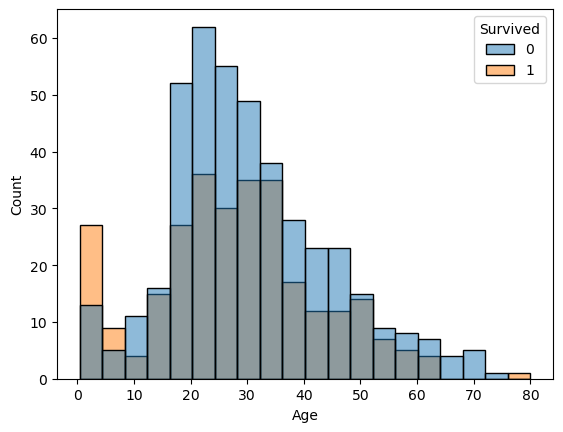

In [10]:
sns.histplot(data= train_df, x='Age', hue='Survived', bins=20)

### Checking ordinal features

- Class 3 contains most people that did not survive
- Class 1 has the highest number of survivors
- `Age` distributions in `Pclass` seem to vary; the higher the class the younger the population

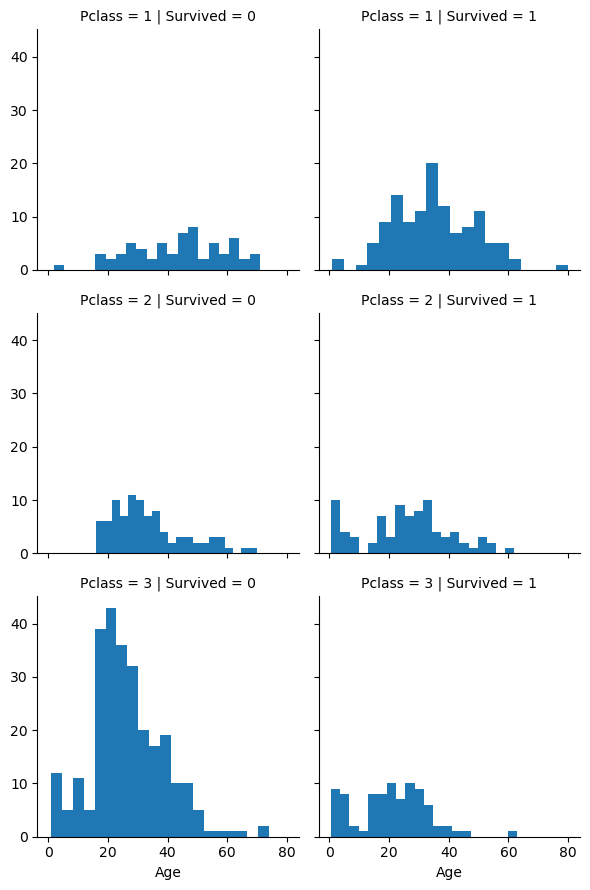

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)

### Correlating categorical features

- Female passengers that embarked from Q and S were significantly more likely to survive than male passengers
- The opposite was applicable for people that embarked at C: could it be that `Embarked` is highly correlated with a feature that is not visible in the plot, e.g. `Age` that correlates to `Survived`
- In general: The higher the class, the lower the chances of survival, except for males that embarked from Q; could it be that no males from class 1 & 2 embarked from Q,

c:\Users\LuukvanRoessel\Anaconda3\envs\ml-luuk\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\LuukvanRoessel\Anaconda3\envs\ml-luuk\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


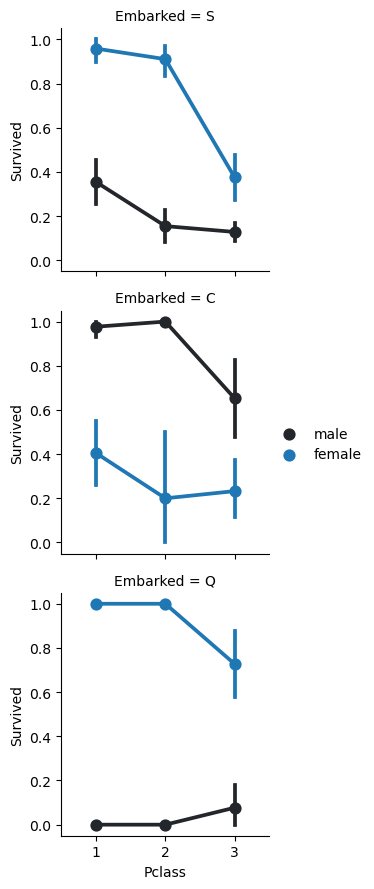

In [12]:
grid = sns.FacetGrid(train_df, row= "Embarked")
grid.map(sns.pointplot, "Pclass", "Survived", "Sex")
grid.add_legend()

- Fares for C were highest
- Fares for Q were lowest
- People that departed from C and survived payed on average more for their tickets than people that also embarked from C but had a lower fare. (Also visible for other `Embarked` categories)
- for most situations, females payed more for their tickets than males
- 


c:\Users\LuukvanRoessel\Anaconda3\envs\ml-luuk\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


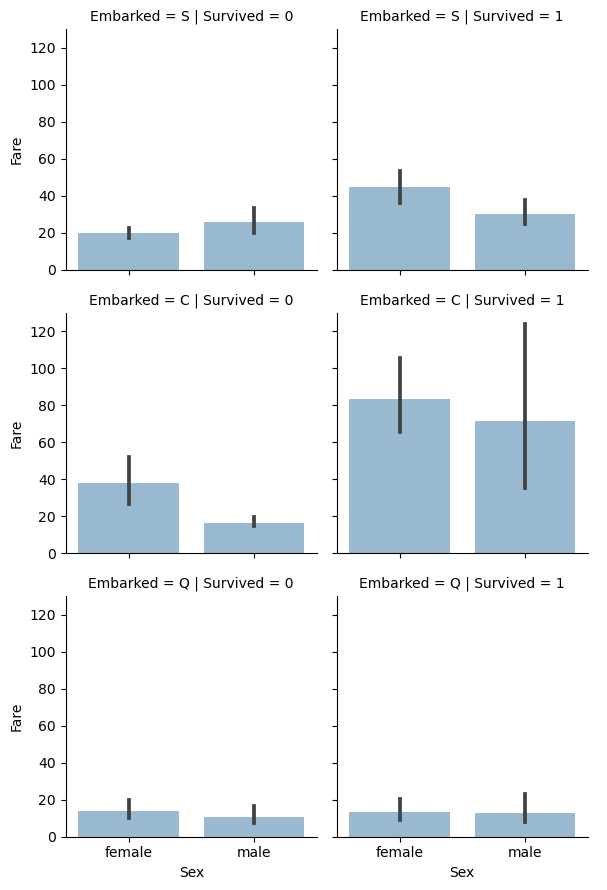

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()